In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()

In [3]:
DATA_FOLDER = 'LAM data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

In [4]:
data_file_north = os.path.join(DATA_FOLDER, 'lamraw_4_18_276.xlsx')
# data_file_south = os.path.join(DATA_FOLDER, 'lamraw_107_18_276.xlsx')
# data_file_east = os.path.join(DATA_FOLDER, 'lamraw_159_18_276.xlsx')
# data_file_west = os.path.join(DATA_FOLDER, 'lamraw_128_18_276.xlsx')

df_n = pd.read_excel(data_file_north)
# df_s = pd.read_excel(data_file_south)
# df_e = pd.read_excel(data_file_east)
# df_w = pd.read_excel(data_file_west)

df_n

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,4,18,276,0,0,8,99,1960-03-01 00:00:00,2,Hämeenlinna,1,92,0,899,-2,0
1,4,18,276,0,0,9,53,1980-03-01 00:00:00,3,Hämeenlinna,1,102,0,953,-2,0
2,4,18,276,0,0,18,4,1960-03-01 00:00:00,2,Hämeenlinna,1,101,0,1804,890,0
3,4,18,276,0,0,41,99,1980-03-01 00:00:00,6,Helsinki,1,106,0,4199,-2,0
4,4,18,276,0,0,46,99,22.20,5,Helsinki,5,92,0,4699,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64823,4,18,276,23,59,19,99,1960-03-01 00:00:00,2,Hämeenlinna,1,93,0,8635999,4286,0
64824,4,18,276,23,59,20,63,1960-03-01 00:00:00,2,Hämeenlinna,1,95,0,8636063,50,0
64825,4,18,276,23,59,21,99,2020-03-01 00:00:00,2,Hämeenlinna,1,89,0,8636199,122,0
64826,4,18,276,23,59,31,99,1960-06-01 00:00:00,2,Hämeenlinna,1,99,0,8637199,987,0


Between 6:00 - 9:00

In [5]:
# def f(x): 
#     return datetime.time(x['hour'], x['minute'], x['second'])
# df_n['time_event'] = df_n.apply(f, axis=1)
# timing_6to9 = (datetime.time(hour=6) <= df_n.time_event) & (df_n.time_event < datetime.time(hour=9))
# timing_6to9

In [6]:
timing_6to9 = (6 <= df_n.hour) & (df_n.hour < 9)
timing_6to9

0        False
1        False
2        False
3        False
4        False
         ...  
64823    False
64824    False
64825    False
64826    False
64827    False
Name: hour, Length: 64828, dtype: bool

In [7]:
dirHelsinki = df_n['direction'] == 'Helsinki'
dirHelsinki

0        False
1        False
2        False
3         True
4         True
         ...  
64823    False
64824    False
64825    False
64826    False
64827    False
Name: direction, Length: 64828, dtype: bool

In [8]:
df_timing_6to9_dirHelsinki = df_n[timing_6to9 & dirHelsinki]
df_timing_6to9_dirHelsinki

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
2562,4,18,276,6,0,1,5,3.00,6,Helsinki,1,80,0,2160105,392,0
2564,4,18,276,6,0,2,99,1980-03-01 00:00:00,6,Helsinki,1,83,0,2160299,180,0
2565,4,18,276,6,0,3,4,1980-03-01 00:00:00,5,Helsinki,1,94,0,2160304,893,0
2566,4,18,276,6,0,4,99,1960-03-01 00:00:00,6,Helsinki,1,88,0,2160499,183,0
2568,4,18,276,6,0,6,25,1980-03-01 00:00:00,6,Helsinki,1,88,0,2160625,111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17061,4,18,276,8,59,53,13,4.00,6,Helsinki,1,91,0,3239313,591,0
17062,4,18,276,8,59,53,99,2020-04-01 00:00:00,4,Helsinki,1,102,0,3239399,1130,0
17064,4,18,276,8,59,56,99,1960-05-01 00:00:00,6,Helsinki,1,89,0,3239699,370,0
17065,4,18,276,8,59,56,99,1980-03-01 00:00:00,5,Helsinki,1,99,0,3239699,655,0


In [9]:
speed = df_timing_6to9_dirHelsinki['speed']

In [10]:
np.mean(speed) # average speed 

56.42948392983879

In [11]:
np.std(speed)

25.162259014759876

<AxesSubplot:xlabel='speed', ylabel='Density'>

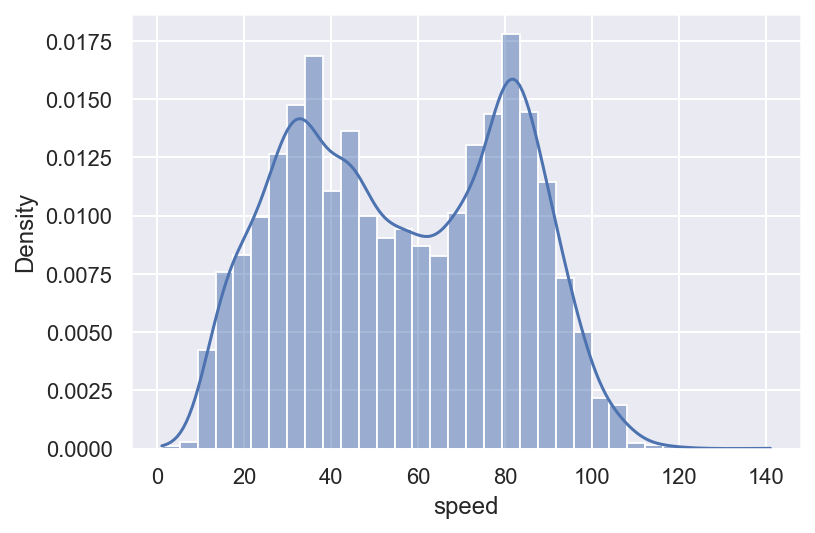

In [12]:
sns.histplot(speed, stat="density", kde=True)

In [13]:
df = df_n[timing_6to9 & dirHelsinki] 

In [14]:
def f(x): 
    return (x['hour'] - 6)*60 + x['minute']
df['min_since_6'] = df.apply(f, axis=1)

<ipython-input-14-b09f08bc06bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_since_6'] = df.apply(f, axis=1)


In [15]:
df

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical),min_since_6
2562,4,18,276,6,0,1,5,3.00,6,Helsinki,1,80,0,2160105,392,0,0
2564,4,18,276,6,0,2,99,1980-03-01 00:00:00,6,Helsinki,1,83,0,2160299,180,0,0
2565,4,18,276,6,0,3,4,1980-03-01 00:00:00,5,Helsinki,1,94,0,2160304,893,0,0
2566,4,18,276,6,0,4,99,1960-03-01 00:00:00,6,Helsinki,1,88,0,2160499,183,0,0
2568,4,18,276,6,0,6,25,1980-03-01 00:00:00,6,Helsinki,1,88,0,2160625,111,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17061,4,18,276,8,59,53,13,4.00,6,Helsinki,1,91,0,3239313,591,0,179
17062,4,18,276,8,59,53,99,2020-04-01 00:00:00,4,Helsinki,1,102,0,3239399,1130,0,179
17064,4,18,276,8,59,56,99,1960-05-01 00:00:00,6,Helsinki,1,89,0,3239699,370,0,179
17065,4,18,276,8,59,56,99,1980-03-01 00:00:00,5,Helsinki,1,99,0,3239699,655,0,179


In [16]:
time_limits = np.arange(0, 181, 5)
time_limits

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180])

In [17]:
time_group = np.zeros(len(df))
for i in range(len(time_limits)-1):
    a, b = time_limits[i], time_limits[i+1]
    belong_to_i = (a <= df.min_since_6) & (df.min_since_6 < b)
    idx_belong_to_i = df[belong_to_i].index
    df.loc[idx_belong_to_i, 'group'] = i

/Users/kazuichirotaira/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/kazuichirotaira/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/kazuichirotaira/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A 

In [18]:
df

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical),min_since_6,group
2562,4,18,276,6,0,1,5,3.00,6,Helsinki,1,80,0,2160105,392,0,0,0.0
2564,4,18,276,6,0,2,99,1980-03-01 00:00:00,6,Helsinki,1,83,0,2160299,180,0,0,0.0
2565,4,18,276,6,0,3,4,1980-03-01 00:00:00,5,Helsinki,1,94,0,2160304,893,0,0,0.0
2566,4,18,276,6,0,4,99,1960-03-01 00:00:00,6,Helsinki,1,88,0,2160499,183,0,0,0.0
2568,4,18,276,6,0,6,25,1980-03-01 00:00:00,6,Helsinki,1,88,0,2160625,111,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17061,4,18,276,8,59,53,13,4.00,6,Helsinki,1,91,0,3239313,591,0,179,35.0
17062,4,18,276,8,59,53,99,2020-04-01 00:00:00,4,Helsinki,1,102,0,3239399,1130,0,179,35.0
17064,4,18,276,8,59,56,99,1960-05-01 00:00:00,6,Helsinki,1,89,0,3239699,370,0,179,35.0
17065,4,18,276,8,59,56,99,1980-03-01 00:00:00,5,Helsinki,1,99,0,3239699,655,0,179,35.0


In [19]:
speeds = df.groupby('group')['speed'].mean()
speeds

group
0.0     90.808081
1.0     88.273684
2.0     88.753304
3.0     87.592453
4.0     83.767241
5.0     85.777778
6.0     83.144476
7.0     83.856041
8.0     84.346260
9.0     78.722543
10.0    36.361809
11.0    29.597315
12.0    42.561983
13.0    36.900763
14.0    28.791667
15.0    34.502283
16.0    58.744000
17.0    73.611276
18.0    70.919881
19.0    46.436047
20.0    49.370166
21.0    32.267361
22.0    29.237226
23.0    29.180851
24.0    20.210526
25.0    25.568548
26.0    52.849530
27.0    56.186186
28.0    35.447154
29.0    34.882129
30.0    31.037543
31.0    31.886926
32.0    37.017483
33.0    33.815603
34.0    46.924837
35.0    74.126354
Name: speed, dtype: float64

## Average speed (Aggregated 5 minutes - 6 ~ 9 am)

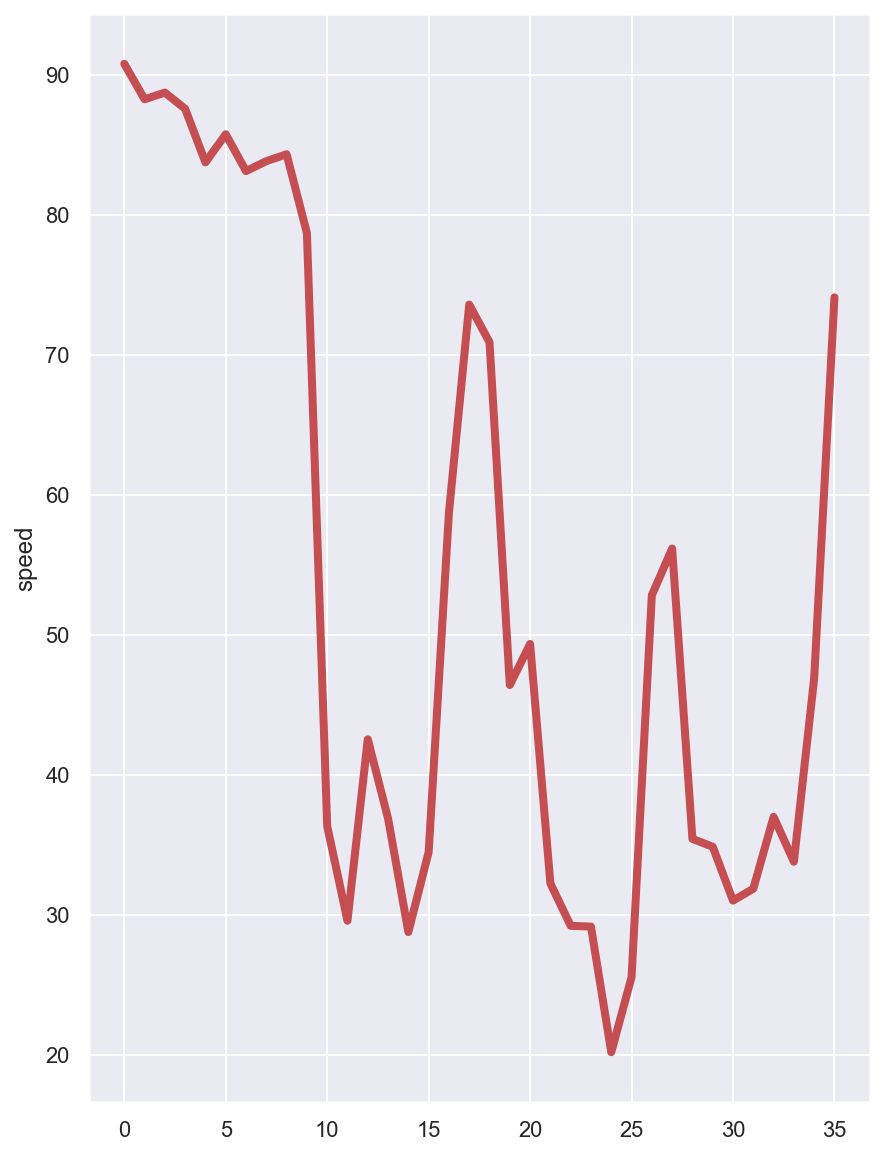

In [20]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.lineplot(x=np.arange(len(speeds)), y=speeds, lw=4, color='C3');
# ax.set_xticks('');

In [21]:
n = df['group'].value_counts().sort_index()
n

0.0     198
1.0     190
2.0     227
3.0     265
4.0     348
5.0     360
6.0     353
7.0     389
8.0     361
9.0     346
10.0    199
11.0    149
12.0    121
13.0    131
14.0    120
15.0    219
16.0    375
17.0    337
18.0    337
19.0    344
20.0    362
21.0    288
22.0    274
23.0    282
24.0    152
25.0    248
26.0    319
27.0    333
28.0    246
29.0    263
30.0    293
31.0    283
32.0    286
33.0    282
34.0    306
35.0    277
Name: group, dtype: int64

In [22]:
flow = n / (300/3600) # aggregated volume / 5 minites - [veh/hour]
flow

0.0     2376.0
1.0     2280.0
2.0     2724.0
3.0     3180.0
4.0     4176.0
5.0     4320.0
6.0     4236.0
7.0     4668.0
8.0     4332.0
9.0     4152.0
10.0    2388.0
11.0    1788.0
12.0    1452.0
13.0    1572.0
14.0    1440.0
15.0    2628.0
16.0    4500.0
17.0    4044.0
18.0    4044.0
19.0    4128.0
20.0    4344.0
21.0    3456.0
22.0    3288.0
23.0    3384.0
24.0    1824.0
25.0    2976.0
26.0    3828.0
27.0    3996.0
28.0    2952.0
29.0    3156.0
30.0    3516.0
31.0    3396.0
32.0    3432.0
33.0    3384.0
34.0    3672.0
35.0    3324.0
Name: group, dtype: float64

## Aggregated Traffic volume (5 minutes - 6 ~ 9 am)

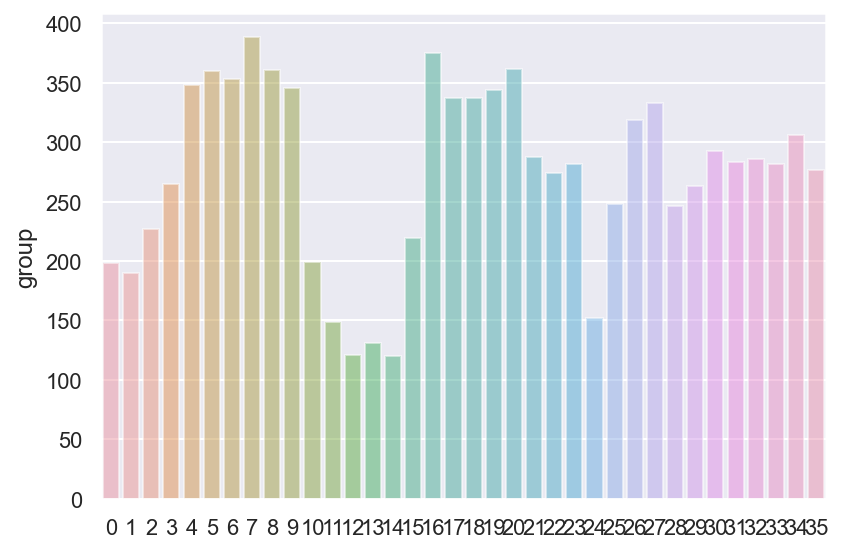

In [23]:
sns.barplot(x=np.arange(len(n)), y=n, alpha=0.5)
plt.tight_layout();

## Average speed and traffic volume

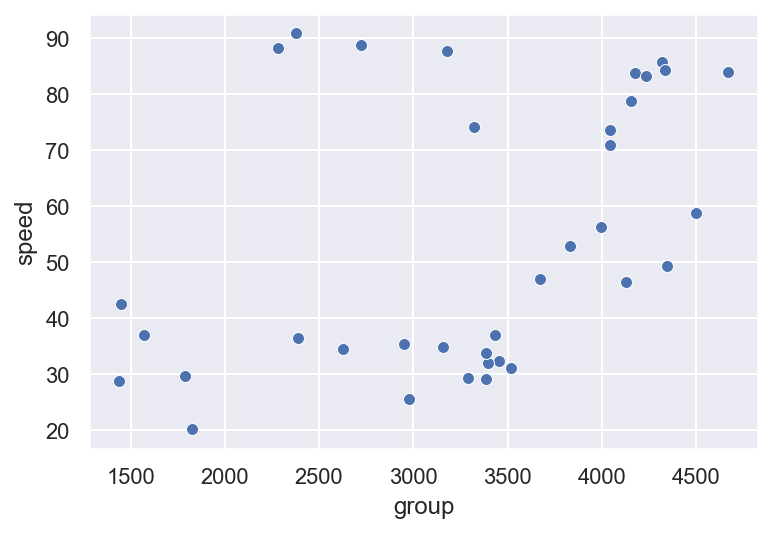

In [24]:
sns.scatterplot(x=flow, y=speeds);

In [25]:
Density = n / speeds
Density

0.0     2.180423
1.0     2.152397
2.0     2.557651
3.0     3.025375
4.0     4.154369
5.0     4.196891
6.0     4.245622
7.0     4.638903
8.0     4.279976
9.0     4.395183
10.0    5.472775
11.0    5.034240
12.0    2.842913
13.0    3.550062
14.0    4.167873
15.0    6.347406
16.0    6.383631
17.0    4.578103
18.0    4.751841
19.0    7.408038
20.0    7.332363
21.0    8.925428
22.0    9.371614
23.0    9.663872
24.0    7.520833
25.0    9.699416
26.0    6.036005
27.0    5.926724
28.0    6.939908
29.0    7.539677
30.0    9.440180
31.0    8.875111
32.0    7.726079
33.0    8.339346
34.0    6.521067
35.0    3.736863
dtype: float64

## Aggregated  traffic volume and density

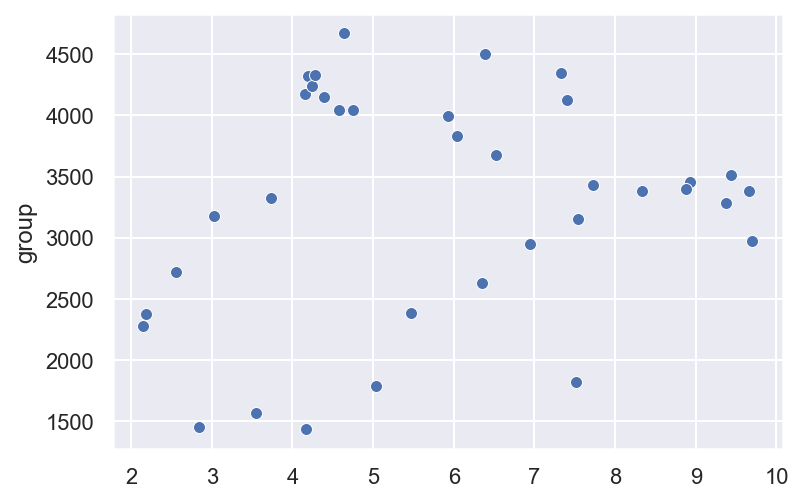

In [26]:
sns.scatterplot(x=Density, y=flow);

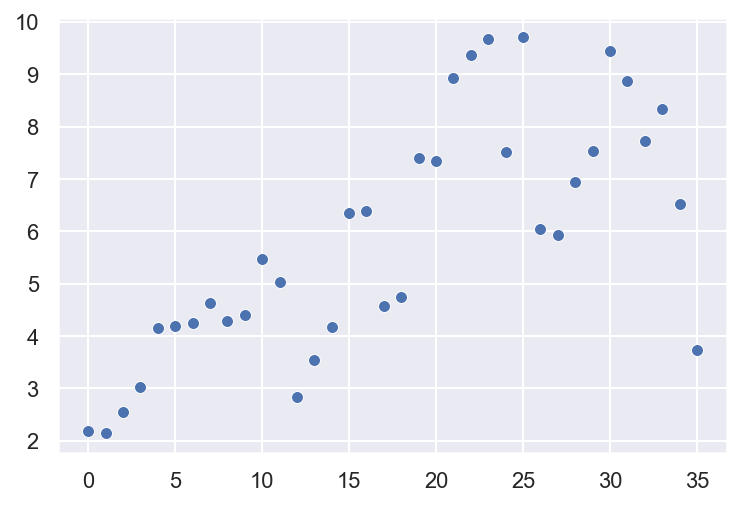

In [27]:
sns.scatterplot(x=Density.index, y=Density);

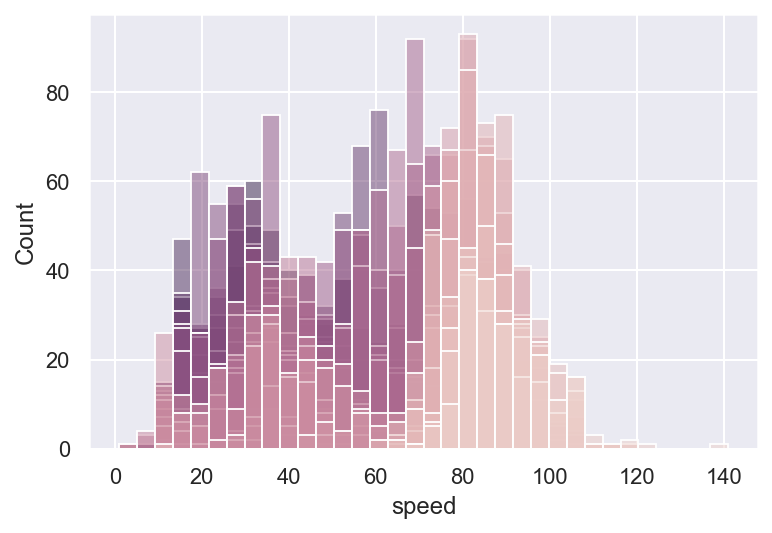

In [31]:
sns.histplot(x='speed', data=df, hue='group', legend=False);

In [ ]:
[2.180423, 2.152397, 2.557651, 3.025375, 4.154369, 4.196891, 4.245622, 4.638903, 4.279976, 4.395183, 5.472775, 5.034240, 
 2.842913, 3.550062, 4.167873, 6.347406, 6.383631, 4.578103, 4.751841, 7.408038, 7.332363, 8.925428, 9.371614, 9.663872,
 7.520833, 9.699416, 6.036005, 5.926724, 6.939908, 7.539677, 9.440180, 8.875111, 7.726079, 8.339346, 6.521067, 3.736863]